<a href="https://colab.research.google.com/github/CarlosGG18/Post-Disaster-Semenatic-Segmentation/blob/main/PSPNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install segmentation-models

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import cv2
import os
import tensorflow 
import keras
keras.utils.generic_utils = keras.utils
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
import random
import segmentation_models as sm
from segmentation_models import PSPNet
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
import matplotlib

Segmentation Models: using `keras` framework.


In [ ]:
#Preprocessing params
train_grid_size =384
resize_dim = (2*train_grid_size, 2*train_grid_size)
height = train_grid_size
width = train_grid_size
img_height = 3000
img_width = 4000
h_n = int(resize_dim[0]/height)
w_n = int(resize_dim[0]/width)
n_classes=10
num_images= 600

In [ ]:
#P2PNet Params
lr = 0.0001
dropout=0.2
backbone= 'resnet101'
# power = 0.9

In [ ]:
wd = os.getcwd()

In [ ]:
train_dir = wd + "/drive/MyDrive/Floodnet/train/train-org-img"

In [ ]:
train_flooded_images= []
img = os.listdir(train_dir)
img.sort()
img = img[:num_images]
for img_path in img:
  img = cv2.imread("/".join((train_dir,img_path)),1)
  img = img[0:img_height, 0:img_width, :]
  img = cv2.resize(img,resize_dim)
  i=0
  j=0
  y=0

  for i in range(h_n):
    x=0
    for j in range(w_n):
      img_crop = img[y:(y+height),x:(x+width),:]
      train_flooded_images.append(img_crop)
      x+=width
    y+=height
train_flooded_images = np.array(train_flooded_images)

In [ ]:
train_mask_dir= wd+"/drive/MyDrive/Floodnet/train/train-label-img"

In [ ]:
train_flooded_mask = []
mask = os.listdir(train_mask_dir)
mask.sort()
mask = mask[:num_images]
for mask_path in mask:
  mask = cv2.imread("/".join((train_mask_dir,mask_path)),0)
  mask = mask[0:img_height,0:img_width]
  mask = cv2.resize(mask, resize_dim)
  i=0
  j=0
  y=0
  for i in range(h_n):
    x=0
    for j in range(w_n):
      mask_crop = mask[y:(y+height),x:(x+width)]
      train_flooded_mask.append(mask_crop)
      x+=width
    y+=height
train_flooded_mask = np.array(train_flooded_mask)

In [ ]:
test_dir = wd+"/drive/MyDrive/Floodnet/test/test-org-img"

In [ ]:
test_flooded_images= []
img_2= os.listdir(test_dir)
img_2.sort()
img_2 = img_2[:num_images]
for img_path in img_2:
  img = cv2.imread("/".join((test_dir,img_path)),1)
  img = img[0:img_height, 0:img_width, :]
  img = cv2.resize(img,resize_dim)
  i=0
  j=0
  y=0

  for i in range(h_n):
    x=0
    for j in range(w_n):
      img_crop = img[y:(y+height),x:(x+width),:]
      test_flooded_images.append(img_crop)
      x+=width
    y+=height
test_flooded_images = np.array(test_flooded_images)

In [ ]:
test_mask_dir = wd+"/drive/MyDrive/Floodnet/test/test-label-img" 

In [ ]:
test_flooded_mask = []
mask_2= os.listdir(test_mask_dir)
mask_2.sort()
mask_2 = mask_2[:num_images]
for mask_path in mask_2:
  mask = cv2.imread("/".join((test_mask_dir,mask_path)),0)
  mask = mask[0:img_height,0:img_width]
  mask = cv2.resize(mask, resize_dim)
  i=0
  j=0
  y=0
  for i in range(h_n):
    x=0
    for j in range(w_n):
      mask_crop = mask[y:(y+height),x:(x+width)]
      test_flooded_mask.append(mask_crop)
      x+=width
    y+=height
test_flooded_mask = np.array(test_flooded_mask)

In [ ]:
val_dir = wd+"/drive/MyDrive/Floodnet/val/val-org-img"

In [ ]:
val_flooded_images= []
img_3= os.listdir(val_dir)
img_3.sort()
img_3 = img_3[:num_images]
for img_path in img_3:
  img = cv2.imread("/".join((val_dir,img_path)),1)
  img = img[0:img_height, 0:img_width, :]
  img = cv2.resize(img,resize_dim)
  i=0
  j=0
  y=0

  for i in range(h_n):
    x=0
    for j in range(w_n):
      img_crop = img[y:(y+height),x:(x+width),:]
      val_flooded_images.append(img_crop)
      x+=width
    y+=height
val_flooded_images = np.array(val_flooded_images)

In [ ]:
val_mask_dir = wd+ "/drive/MyDrive/Floodnet/val/val-label-img"

In [ ]:
val_flooded_mask = []
mask_3= os.listdir(val_mask_dir)
mask_3.sort()
mask_3 = mask_3[:num_images]
for mask_path in mask_3:
  mask = cv2.imread("/".join((val_mask_dir,mask_path)),0)
  mask = mask[0:img_height,0:img_width]
  mask = cv2.resize(mask, resize_dim)
  i=0
  j=0
  y=0
  for i in range(h_n):
    x=0
    for j in range(w_n):
      mask_crop = mask[y:(y+height),x:(x+width)]
      val_flooded_mask.append(mask_crop)
      x+=width
    y+=height
val_flooded_mask = np.array(val_flooded_mask)

In [ ]:
train_masks_encoded = to_categorical(train_flooded_mask, n_classes)

In [ ]:
test_masks_encoded = to_categorical(test_flooded_mask, n_classes)

In [ ]:
validation_masks_encoded = to_categorical(val_flooded_mask, n_classes)

In [ ]:
# train_flooded_images = train_flooded_images/255

In [ ]:
# test_flooded_images= test_flooded_images/255

In [ ]:
# validation_flooded_images = test_flooded_images/255

In [ ]:
# def poly_lr(epoch,learning_rate=0.0001,power=0.9):
#   lrate= learning_rate*((1-epoch/epochs)**power)
#   return lrate

In [ ]:
def get_model(h=384,w=384,optimiser=Adam(),dropout=0):
  optimiser=Adam()
  model = PSPNet(backbone_name='resnet50',input_shape=(h,w,3),classes=10,activation='softmax',psp_dropout=dropout)
  model.compile(optimizer=optim,loss=sm.losses.categorical_focal_jaccard_loss,metrics=[sm.metrics.iou_score])
  model.summary()
  return model

In [ ]:
optim = Adam(learning_rate=lr)

In [ ]:
model = get_model(height, width, optim, dropout )

In [ ]:
es = EarlyStopping(monitor='val_iou_score', mode='max', pateince = 5)

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/psp_model_resnet50_2.h5', 
                             verbose=1, 
                             monitor="val_iou_score",
                             save_best_only=True, 
                             mode='max')

In [ ]:
history = model.fit(train_flooded_images,train_masks_encoded,batch_size=15 ,epochs=20,verbose=2,validation_data=(val_flooded_images,validation_masks_encoded), callbacks=[checkpoint])

Epoch 1/20

Epoch 1: val_iou_score improved from -inf to 0.07178, saving model to /content/drive/MyDrive/psp_model_resnet50_2.h5
107/107 - 38s - loss: 0.7352 - iou_score: 0.2826 - val_loss: 0.9463 - val_iou_score: 0.0718 - 38s/epoch - 359ms/step
Epoch 2/20

Epoch 2: val_iou_score improved from 0.07178 to 0.11118, saving model to /content/drive/MyDrive/psp_model_resnet50_2.h5
107/107 - 17s - loss: 0.6226 - iou_score: 0.3898 - val_loss: 0.9084 - val_iou_score: 0.1112 - 17s/epoch - 155ms/step
Epoch 3/20

Epoch 3: val_iou_score improved from 0.11118 to 0.19311, saving model to /content/drive/MyDrive/psp_model_resnet50_2.h5
107/107 - 17s - loss: 0.5734 - iou_score: 0.4376 - val_loss: 0.8252 - val_iou_score: 0.1931 - 17s/epoch - 155ms/step
Epoch 4/20

Epoch 4: val_iou_score improved from 0.19311 to 0.22702, saving model to /content/drive/MyDrive/psp_model_resnet50_2.h5
107/107 - 16s - loss: 0.5435 - iou_score: 0.4672 - val_loss: 0.7943 - val_iou_score: 0.2270 - 16s/epoch - 153ms/step
Epoch 5

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

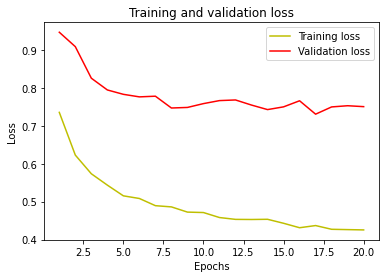

In [ ]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
epochs = range(1,len(iou)+1)

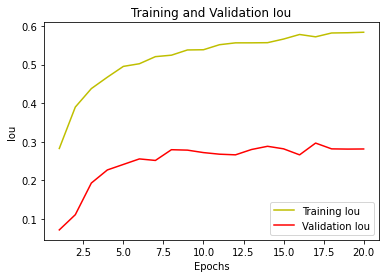

In [ ]:
plt.plot(epochs, iou, 'y', label='Training Iou')
plt.plot(epochs, val_iou, 'r', label='Validation Iou')
plt.title('Training and Validation Iou')
plt.xlabel('Epochs')
plt.ylabel('Iou')
plt.legend()
plt.show()

In [ ]:
def evaluate_random_image(model, test_images, test_masks):
    # choose a random test image
    random_index = np.random.choice(len(test_images))
    test_image = test_images[random_index]
    
    #predictions on the test image
    test_image = np.expand_dims(test_image, axis=0)
    predictions = model.predict(test_image)
    
    #predicted mask
    class_id = predictions.argmax(axis=-1)

    #ground truth 
    ground = test_masks[random_index]
    ground = np.squeeze(ground)
    # create a colormap for 10 classes
    cmap = matplotlib.cm.get_cmap('tab10')
    
    # display the test image, predicted mask, ground truth
    plt.figure(figsize=(15,8))
    plt.subplot(1,3,1)
    plt.imshow(test_image[0])
    plt.title('Test Image')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(ground)
    plt.title('Ground Truth')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(class_id[0])
    plt.title('Predicted Mask')
    plt.axis('off')

    # class_labels = ['Building Non-flooded', 'Building Flooded', 'Road Non-Flooded', 'Road', 'Class 5', 
    #                 'Tree', 'Class 7', 'Car', 'Pool', 'Background']
    # patches = [mpatches.Patch(color=cmap(i), label=class_labels[i]) for i in range(10)]
    # plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

1/1 [==============================] - 0s 188ms/step


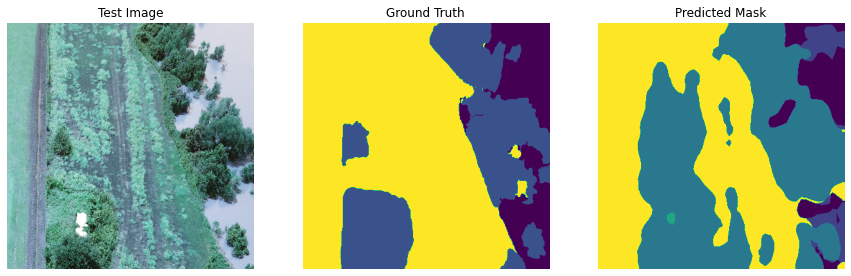

In [ ]:
evaluate_random_image(model, test_flooded_images, test_flooded_mask)